In [10]:
#packages
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
"""functions used 
d - no. of cols (features)
n - number of rows
s - number of non-zero entries (to be varied)
"""
def sketch_matrix(m, n_columns, non_zero_entries):
    #matrix with all zero entries
    S = np.zeros((m, n_columns))
    scaling_factor = 1 / np.sqrt(non_zero_entries)
    #loop through each columns to edit the non zero entries in
    for col in range(n_columns):
        # Randomly select position of non_zero entries
        nz_positions = np.random.choice(m, non_zero_entries, replace=False)
        
        # Randomly assign values of either 1 or -1 to these positions
        values = np.random.choice([1, -1], non_zero_entries)* scaling_factor
        
        # Assign the values to the selected positions in the column
        for idx, value in zip(nz_positions, values):
            S[idx, col] = value
    
    return S

In [3]:
#function to find min max
def find_min_max(S, U):
    SU = S @ U
    smin = np.min(SU)
    smax = np.max(SU)
    return smin, smax

In [4]:
sketch_matrix(10,5,3)

array([[ 0.57735027,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.57735027,  0.        ,  0.        ,  0.57735027,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.57735027,  0.57735027,  0.57735027,  0.        ,  0.57735027],
       [ 0.        ,  0.57735027,  0.        , -0.57735027,  0.        ],
       [ 0.        ,  0.        , -0.57735027,  0.        , -0.57735027],
       [ 0.        ,  0.        , -0.57735027,  0.        , -0.57735027],
       [ 0.        ,  0.        ,  0.        , -0.57735027,  0.        ],
       [ 0.        , -0.57735027,  0.        ,  0.        ,  0.        ]])

In [5]:
#initialise
#n_row is the row of U and dimension of S
n_rows = 1000    
d = 100          
n_sketches = 20
m_values = list(range(100, 1001, 50))

#U matrix
U = np.random.randn(n_rows, d)



In [6]:
#simulation
results = []
for m in m_values:
    s_values = list(range(5, m + 1, 5))
    for s in s_values:
        #temp storing of results
        min_vals = []
        max_vals = []
        total_time = 0
        # Generate multiple sketches for the given (m, s)
        for i in range(n_sketches):
            start_time = time.time()
            # Generate sketch matrix S
            S = sketch_matrix(m, n_rows, s)
            
            # Compute min and max of S @ U
            smin, smax = find_min_max(S, U)
            min_vals.append(smin)
            max_vals.append(smax)
            end_time = time.time()  # End timing
            total_time += (end_time - start_time)
            
        expected_min = np.mean(min_vals)
        expected_max = np.mean(max_vals)
        avg_time = total_time / n_sketches
        results.append({
            "m": m,
            "s": s,
            "min_SU": expected_min,
            "max_SU": expected_max,
            "avg_time": avg_time
        })

#dataframe to store results
results_df = pd.DataFrame(results)

In [7]:
results_df

,m,s,min_SU,max_SU,avg_time
0,100,5,-12.587883,12.473150,0.046539
1,100,10,-12.320821,12.388456,0.036752
2,100,15,-12.432908,12.197448,0.039415
3,100,20,-12.829431,12.748039,0.042238
4,100,25,-11.943747,11.938249,0.037515
...,...,...,...,...,...
2085,1000,980,-4.275822,4.335216,0.227359
2086,1000,985,-4.404420,4.474764,0.233435
2087,1000,990,-4.455326,4.529894,0.226624
2088,1000,995,-4.524343,4.394021,0.228385


In [9]:
results_df["ratio_max_min"] = results_df["max_SU"] / results_df["min_SU"]
results_df

,m,s,min_SU,max_SU,avg_time,ratio_max_min
0,100,5,-12.587883,12.473150,0.046539,-0.990885
1,100,10,-12.320821,12.388456,0.036752,-1.005489
2,100,15,-12.432908,12.197448,0.039415,-0.981062
3,100,20,-12.829431,12.748039,0.042238,-0.993656
4,100,25,-11.943747,11.938249,0.037515,-0.999540
...,...,...,...,...,...,...
2085,1000,980,-4.275822,4.335216,0.227359,-1.013891
2086,1000,985,-4.404420,4.474764,0.233435,-1.015971
2087,1000,990,-4.455326,4.529894,0.226624,-1.016737
2088,1000,995,-4.524343,4.394021,0.228385,-0.971195


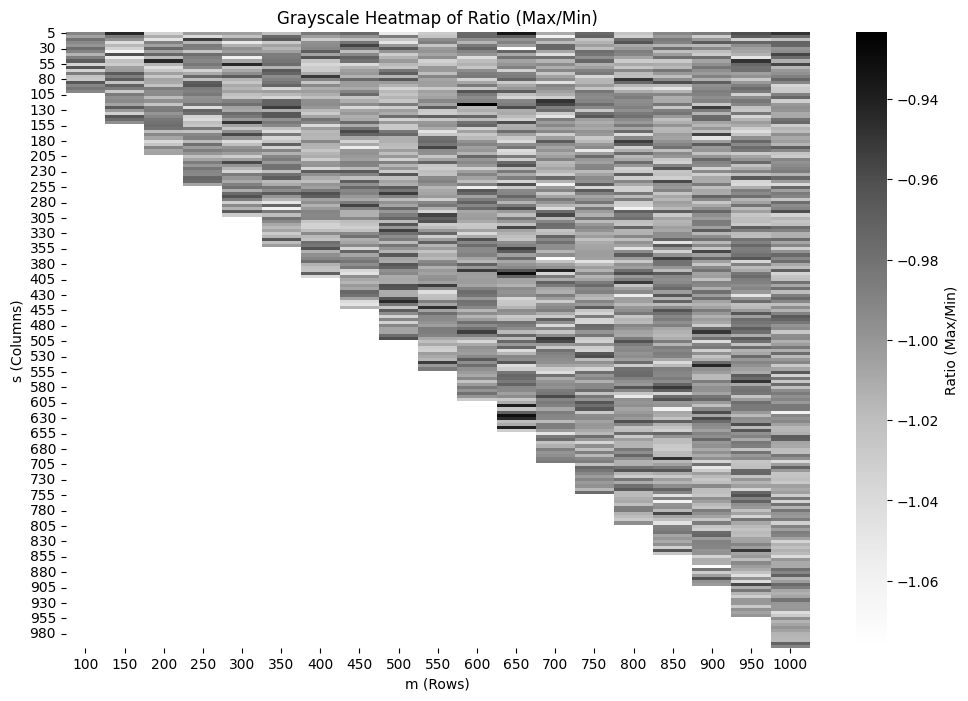

In [12]:
heatmap_data = results_df.pivot(index="s", columns="m", values="ratio_max_min")

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="Greys", annot=False, cbar_kws={"label": "Ratio (Max/Min)"})
plt.title("Grayscale Heatmap of Ratio (Max/Min)")
plt.xlabel("m (Rows)")
plt.ylabel("s (Columns)")
plt.show()

In [15]:
sorted_results = results_df.sort_values(by="abs_diff", ascending=True)

# Select the top few rows with the smallest absolute differences
top_few_rows = sorted_results.head(5)
top_few_rows

,m,s,min_SU,max_SU,avg_time,ratio_max_min,abs_diff
1806,950,535,-4.523558,4.523523,0.142580,-0.999992,0.000008
1514,850,825,-4.759772,4.759733,0.201764,-0.999992,0.000008
736,600,435,-5.650339,5.650441,0.115976,-1.000018,0.000018
1653,900,670,-4.545411,4.545539,0.169193,-1.000028,0.000028
2075,1000,930,-4.384894,4.385124,0.215592,-1.000052,0.000052
